In [32]:
from gas_hale import GasPoweredHALE
import gpkit
import numpy as np
gpkit.settings['latex_modelname'] = False

# to modify the GasPoweredHALE model, edit gas_hale.py

m = GasPoweredHALE()
m.substitutions.update({"t": 5, "BSFC":0.55, "f_{airframe}":0.35})
sol = m.solve()
#m.controlpanel()

Using solver 'cvxopt'
Solving for 20 variables.
Solving took 0.0351 seconds.

Cost
----
 81.72 [lbf] 

Free Variables
--------------
         C_D : 0.04496                Drag coefficient              
         C_L : 1.045                  Lift coefficient              
         C_f : 0.005939               wing skin friction coefficient
  C_{Torque} : 0.1503                 Torque coefficient            
   P_{shaft} : 585.5      [W]         Shaft power                   
          Re : 3.002e+05              Reynolds number               
           S : 1.051      [m**2]      Wing reference area           
     T_{atm} : 249.4      [K]         air temperature               
           V : 33.69      [m/s]       Cruise velocity               
    V_{wind} : 33.69      [m/s]       wind speed                    
           W : 81.72      [lbf]       Aircraft weight               
W_{airframe} : 28.6       [lbf]       Airframe weight               
     W_{eng} : 13         [N]         E

In [7]:
x = sol('W_{fuel}')/sol('W')
y = sol('W_{pay}')/sol('W')
z = sol('P_{shaft}')/745.699872
print x
print y
print z

0.522710580073
0.0752459150488
1.50384903042


In [33]:
import numpy as np
m.substitutions.update({"t": ('sweep', np.linspace(4, 8, 5)),
                        "f_{airframe}": ('sweep', np.linspace(0.25,0.45,4))})
sol = m.solve(solver="mosek", verbosity=0, skipsweepfailures=True)

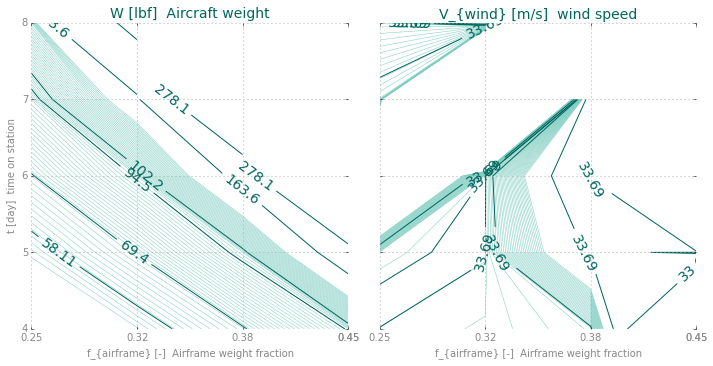

In [36]:
%matplotlib inline
from gpkit.interactive.plotting import contour_array
_ = contour_array(m, "f_{airframe}", "t", ["W", "V_{wind}"])